In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtplot
import seaborn as sns
from pymongo import MongoClient

In [2]:
# Função para conexão com o MongoDB aonde estão os dados de receitas e despesas
def conexao_mongodb (host, port, db):    
    conn = MongoClient (host, port)
    return conn[db]

In [3]:
# Função responsável pela leitura das collections do banco de contas públicas do ES do ano de 2016 
# com os dados de receita e despesa disponibilizados pelo estado através do portal da transparência
# Essa função irá ler os dados da collection passada por parametro e transformará esses dados em um 
# Panda DataFrame
def ler_contaspublicas (colecao, host='localhost', port=27017, no_id=True, _db='contaspublicas'):
    db = conexao_mongodb (host, port, _db)
    cursor = db[colecao].find({})
    contaspublicas_pd = pd.DataFrame (list(cursor))
    
    if no_id:
        del contaspublicas_pd['_id']
        
    return contaspublicas_pd

In [4]:
# Crio um DataFrame com os dados de receitas presentes no banco de dados 
receitas = ler_contaspublicas (colecao = 'receitas', host='localhost', port=27017, _db='contaspublicas')

In [5]:
# Apresento três registros do DataFrame para averiguar se foram corretamente carregados 
receitas.head(3)

,Ano,Codigo,CodigoAlinea,CodigoCategoria,CodigoDetalhamentoFonte,CodigoDetalhamentoFonteAux,CodigoEspecie,CodigoFonte,CodigoGrupoFonte,CodigoIdUso,...,DescricaoOrigem,DescricaoRubrica,DescricaoSubAlinea,DescricaoUG,DescricaoUGEmitente,Documento,Tipo,ValorArrecadada,ValorPrevista,id
0,2016,,111302,1,0,101.000000,111,101,1,0,...,RECEITA TRIBUTARIA,IMPOSTO SOBRE A PRODUCAO E A CIRCULACAO,ICMS - DIFERENCIAL ALIQUOTA DE PRODUTOR RURAL,ADMINISTRAÇÃO GERAL A CARGO DA SEFAZ,ADMINISTRAÇÃO GERAL A CARGO DA SEFAZ,2016PR00001,PREVISTA,0.0,30307.0,487
1,2016,,111302,1,2,101.000002,111,101,1,0,...,RECEITA TRIBUTARIA,IMPOSTO SOBRE A PRODUCAO E A CIRCULACAO,ICMS - SIMPLES NACIONAL,ADMINISTRAÇÃO GERAL A CARGO DA SEFAZ,ADMINISTRAÇÃO GERAL A CARGO DA SEFAZ,2016PR00001,PREVISTA,0.0,51818535.0,491
2,2016,,111302,1,0,101.000000,111,101,1,0,...,RECEITA TRIBUTARIA,IMPOSTO SOBRE A PRODUCAO E A CIRCULACAO,ICMS COMERCIO EXTERIOR,ADMINISTRAÇÃO GERAL A CARGO DA SEFAZ,ADMINISTRAÇÃO GERAL A CARGO DA SEFAZ,2016PR00001,PREVISTA,0.0,110420142.0,499


In [6]:
# Crio um DataFrame com os dados de despesas presentes no banco de dados 
despesas = ler_contaspublicas (colecao='despesas', host='localhost', port=27017, _db='contaspublicas')

In [7]:
# Apresento três registros do DataFrame para averiguar se foram corretamente carregados 
despesas.head(3)

,Acao,Ano,CargoFuncao,CategoriaEconomica,CodigoAcao,CodigoCategoriaEconomica,CodigoElementoDespesa,CodigoFonte,CodigoFuncao,CodigoFuncionalProgramatica,...,SubFuncao,SubelementoDespesa,Subtitulo,TipoFavorecido,TipoLicitacao,UnidadeGestora,ValorEmpenho,ValorLiquidado,ValorPago,ValorRap
0,ADMINISTRAÇÃO DA UNIDADE,2016,,DESPESAS CORRENTES,2070,3,14,671,20,0,...,ADMINISTRAÇÃO GERAL,DIÁRIAS - CIVIL - NO PAÍS - DENTRO DO ESTADO,ESTADO,1,NÃO APLICÁVEL - DIÁRIAS,INSTITUTO CAPIXABA PESQUISA ASSISTÊNCIA TÉCNIC...,0.0,0.0,-56.0,0.0
1,CAPACITAÇÃO E TREINAMENTO DE RECURSOS HUMANOS,2016,,DESPESAS CORRENTES,2077,3,14,101,20,0,...,FORMAÇÃO DE RECURSOS HUMANOS,DIÁRIAS - CIVIL - NO PAÍS - DENTRO DO ESTADO,ESTADO,1,NÃO APLICÁVEL - DIÁRIAS,INSTITUTO CAPIXABA PESQUISA ASSISTÊNCIA TÉCNIC...,0.0,0.0,56.0,0.0
2,PROTEÇÃO DOS RECURSOS NATURAIS RENOVÁVEIS,2016,,DESPESAS CORRENTES,8382,3,14,271,20,0,...,CONTROLE AMBIENTAL,DIÁRIAS - CIVIL - NO PAÍS - DENTRO DO ESTADO,ESTADO,1,NÃO APLICÁVEL - DIÁRIAS,INSTITUTO DE DEFESA AGROPECUÁRIA FLORESTAL ESP...,0.0,0.0,336.0,0.0


In [8]:
# Limpo os dados excluindo aquelas linhas que não tem Valor Pago no DataFrame de despesas
despesas = despesas.dropna (subset=['ValorPago'], axis=0) 

In [9]:
# Limpo os dados excluindo aquelas receitas que não tem valores Arrecadados no DataFrame de receitas
receitas = receitas.dropna (subset=['ValorArrecadada'], axis=0) 

In [10]:
# Faço o somatório de todas as despesas usando as informações do ValorPago + Valor Rap
# O Valor RAP é somado as depesas porque no site da Transparência esse valor é acrescentado 
# ao valor pago.
# Ao final da soma, apresento o valor calculado 
total_despesas = despesas['ValorPago'].sum() + despesas['ValorRap'].sum()
print (total_despesas)

12377734134.5


In [11]:
# Faço o somatório de todas as receitas usando as informações do Valor Arrecadado
# Ao final da soma, apresento o valor calculado 
total_receitas = receitas['ValorArrecadada'].sum()
print (total_receitas)

14810772647.9


In [12]:
# Crio uma série para plotar o resultado obtido 
receita_versus_despesas = pd.Series ([total_despesas, total_receitas], index=['despesas','receitas'])

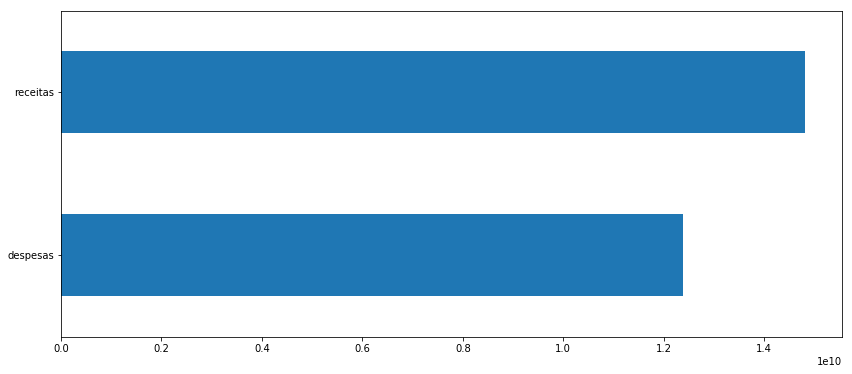

In [13]:
# Apresento gráficamente o resultado obtido
receita_versus_despesas.plot(kind='barh', figsize=(14,6))

In [14]:
# Calculo o superavit do Estado considerando apenas as fontes de receitas e despeasas do ano de 2016 
# ao final, apresento o resultado 
superavit = total_receitas - total_despesas
print (superavit)

2433038513.43


In [15]:
decricao_especie_receitas = {} # Dicionário que vai armazenar o grupo com as maiores receitas
nome_especie_receitas = receitas['DescricaoEspecie'].unique() # Trago os valores únicos possíveis para as descrições de receitas 

In [17]:
for i in nome_especie_receitas:
    i_nome = receitas[receitas['DescricaoEspecie'] == i] # Série criada somente quando a descrição de receita aparece 
    total_receitas_descricao = i_nome['ValorArrecadada'].sum() # Acumulo o valor total para esta descrição
    decricao_especie_receitas[i] = total_receitas_descricao  # Atribuo esse valor ao dicionário 
    receitas_por_fonte = pd.DataFrame.from_dict(decricao_especie_receitas, orient='index') # Crio um DataFrame com base no dicionário 
    receitas_por_fonte.columns = ['ValorArrecadada'] # Altero o valor da coluna 

In [27]:
receitas_por_fonte.head(10)

,ValorArrecadada
IMPOSTOS,5.996114e+09
TRANSFERENCIAS INTERGOVERNAMENTAIS,4.086865e+09
CONTRIBUICOES SOCIAIS,2.790311e+09
RECEITAS DE VALORES MOBILIARIOS,7.298828e+08
TAXAS,4.538280e+08
RECEITAS DIVERSAS,1.524244e+08
RECEITA DA DIVIDA ATIVA,1.062117e+08
MULTAS E JUROS DE MORA,9.836913e+07
INDENIZACOES E RESTITUICOES,9.781057e+07
OPERACOES DE CREDITO INTERNAS,7.898307e+07


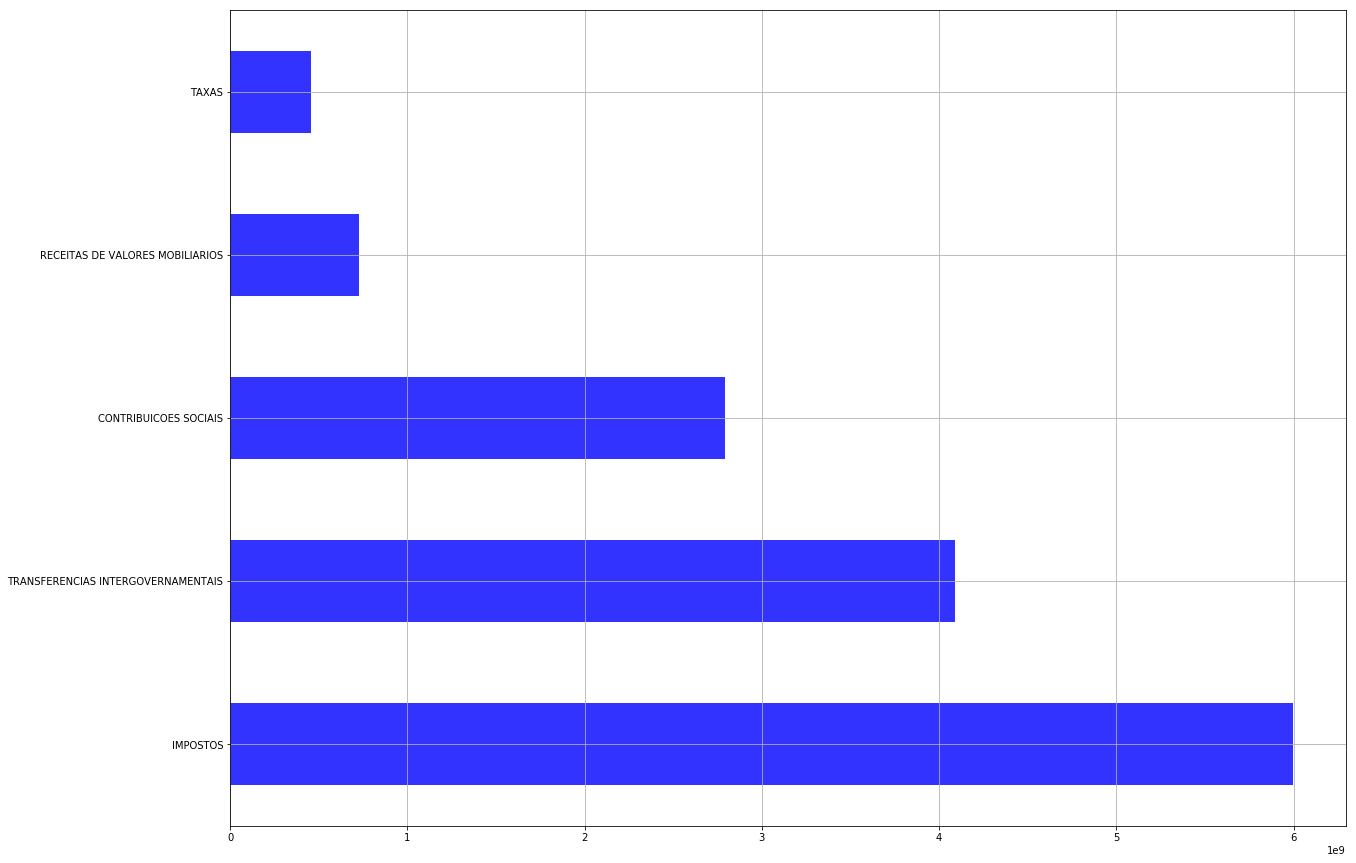

In [34]:
receitas_por_fonte = receitas_por_fonte.sort_values('ValorArrecadada', ascending=False)
receitas_por_fonte.head(5).plot(kind='barh', figsize=(20,15), color='blue', legend=False, grid=True, alpha=0.8)

In [33]:
receitas_por_fonte.head(5)['ValorArrecadada'].sum()

14057001341.890057

In [36]:
decricao_grupo_despesas = {} # Dicionário que vai armazenar o grupo com as maiores despesas 
nome_grupo_despesas = despesas['GrupoDespesa'].unique() # Trago os valores únicos possíveis para os grupos de despesas 

In [38]:
for i in nome_grupo_despesas:
    i_nome = despesas[despesas['GrupoDespesa'] == i] # Série criada somente quando o grupo de despesa aparece 
    total_grupo_despesas = i_nome['ValorPago'].sum() + i_nome['ValorRap'].sum() # Acumulo o valor total para este grupo de despesas
    decricao_grupo_despesas[i] = total_grupo_despesas # Atribuo esse valor ao dicionário 
    despesas_por_grupo_despesas = pd.DataFrame.from_dict(decricao_grupo_despesas, orient='index') # Crio um DataFrame com base no dicionário 
    despesas_por_grupo_despesas.columns = ['ValorGasto'] # Altero o valor da coluna 

In [39]:
despesas_por_grupo_despesas.head(10) # Imprimir as primeiras 10 linhas 

,ValorGasto
OUTRAS DESPESAS CORRENTES,3.159987e+09
JUROS E ENCARGOS DA DÍVIDA,3.145955e+08
INVERSÕES FINANCEIRAS,4.287931e+08
INVESTIMENTOS,4.905583e+08
AMORTIZAÇÃO DA DÍVIDA,2.638948e+08
PESSOAL E ENCARGOS SOCIAIS,7.719906e+09


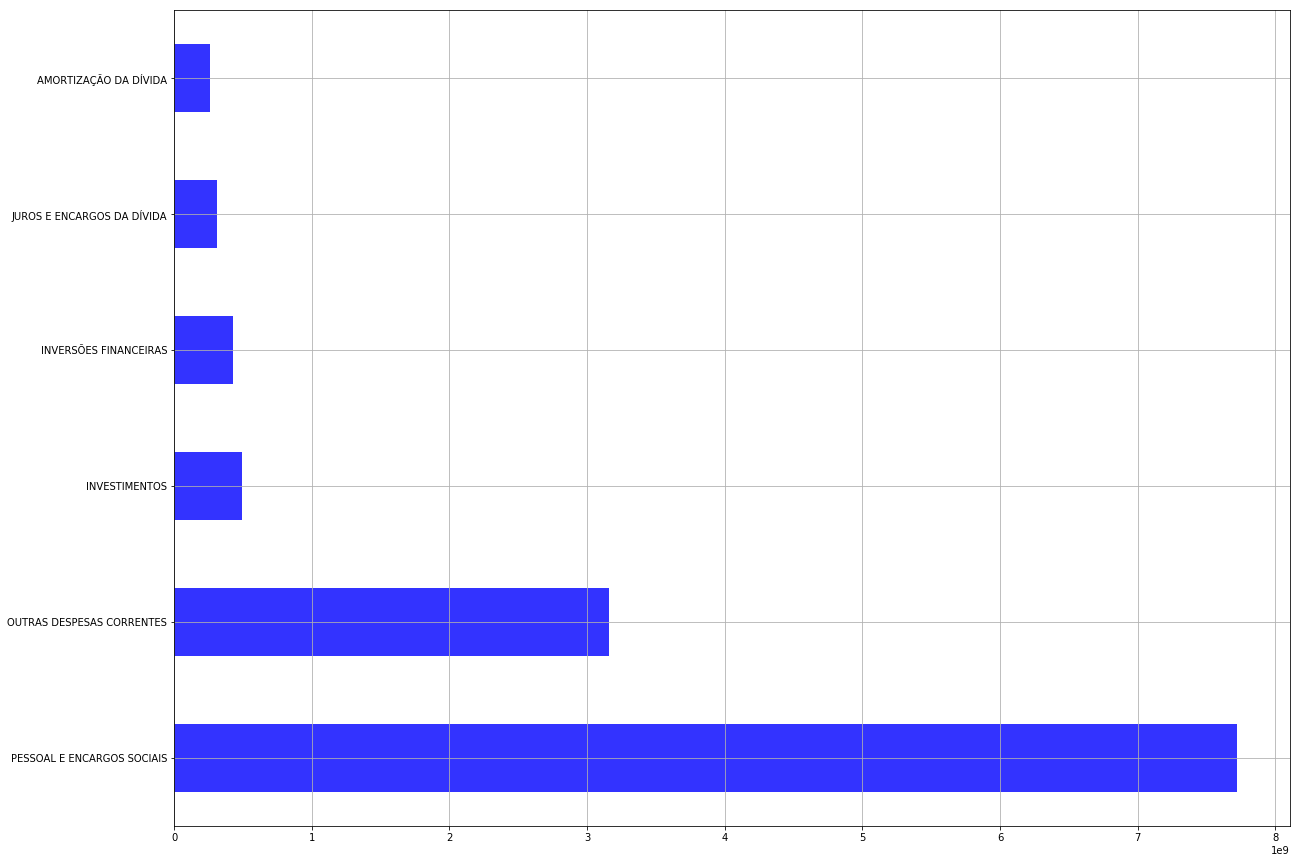

In [40]:
despesas_por_grupo_despesas = despesas_por_grupo_despesas.sort_values('ValorGasto', ascending=False) # Ordeno por valor gasto 
despesas_por_grupo_despesas.head(6).plot(kind='barh', figsize=(20,15), color='blue', legend=False, grid=True, alpha=0.8)